In [1]:
import HandleWeights as hw
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../DataProcessing")
import ReweightMCDataLoading as rmc

In [2]:
reweight = "/global/homes/b/badea/aleph/unfold-ee-logtau/DataProcessing/Reweight_HERWIG7.reweight.npy"
reweight = np.load(reweight)
print(reweight.shape)

(191125,)


In [3]:
aleph_mc = rmc.loadDataParticles(
        filePath = rmc.mc_paths["ArchivedPYTHIA6"]["path"],
        treeName = rmc.mc_paths["ArchivedPYTHIA6"]["tree"],
        branches = ["px", "py", "pz", "mass", "charge"],
        maxNPart = 80,
        padValue = -999
    )
print(aleph_mc.shape)

new_mc = rmc.loadDataParticles(
    filePath = rmc.mc_paths["HERWIG7"]["path"], 
    treeName = rmc.mc_paths["HERWIG7"]["tree"],
    branches = ["px", "py", "pz", "mass", "charge"],
    maxNPart = 80,
    padValue = -999
)
print(new_mc.shape)

(771597, 80, 5)
(191125, 80, 5)


In [7]:
print(reweight.shape)
# reweight_reshaped = np.tile(reweight, (new_mc.shape[0], new_mc.shape[1], 1))
reweight_reshaped = np.tile(reweight[:, np.newaxis, np.newaxis], (1, new_mc.shape[1], 1))
print(reweight_reshaped.shape)


(191125,)
(191125, 80, 1)


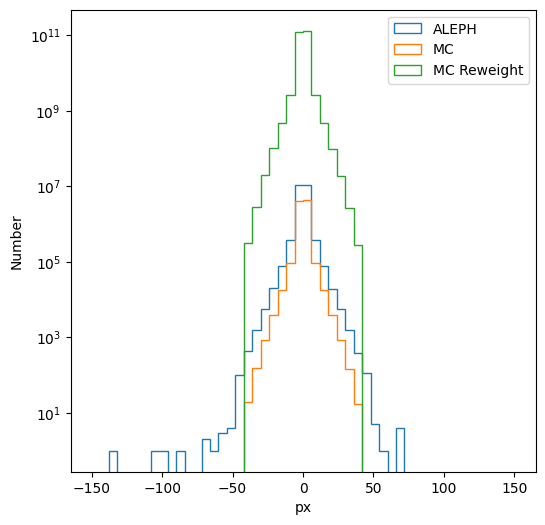

In [12]:

fig, ax = plt.subplots(figsize=(6, 6))
bins = np.linspace(-150, 150, 51)
i = 0
density=False

mask = aleph_mc[:,:,i].flatten() != -999
ax.hist(aleph_mc[:,:,i].flatten()[mask], bins=bins, histtype="step", label="ALEPH", density=density)

mask = new_mc[:,:,i].flatten() != -999
ax.hist(new_mc[:,:,i].flatten()[mask], bins=bins, histtype="step", label="MC", density=density)
ax.hist(new_mc[:,:,i].flatten()[mask], bins=bins, histtype="step", label="MC Reweight", weights=reweight_reshaped.flatten()[mask], density=density)

ax.set_xlabel('px')
ax.set_ylabel('Number')
ax.set_yscale("log")
ax.legend()
plt.show()


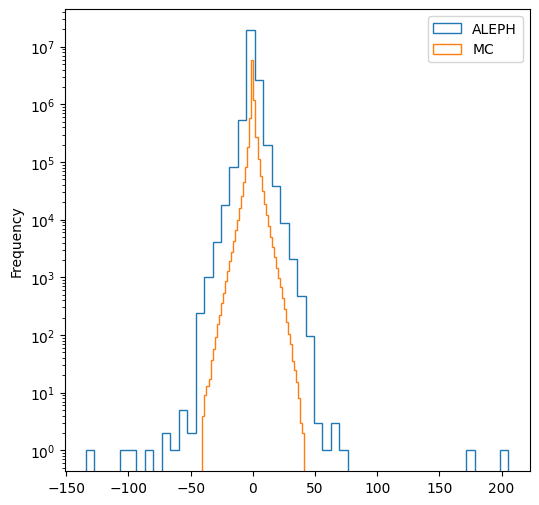

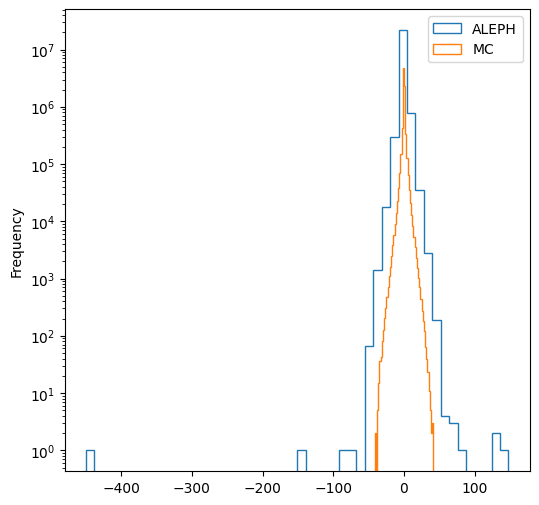

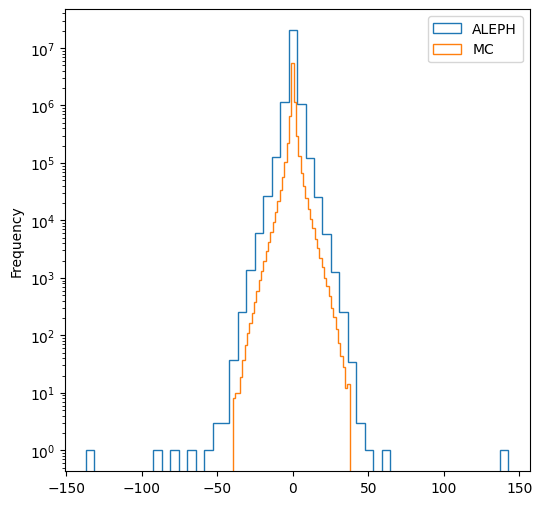

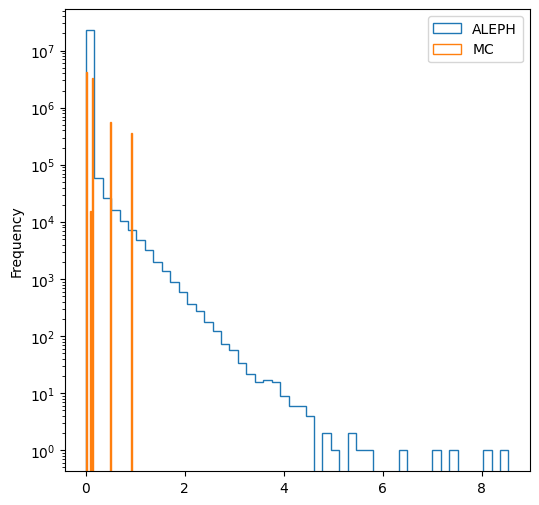

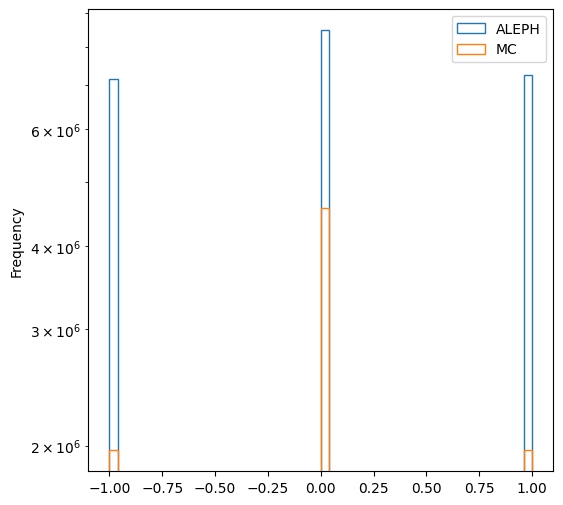

In [ ]:
for i in range(3):
    fig, ax = plt.subplots(figsize=(6, 6))
    bins = 50 # np.linspace(0, 0.03, 51)
    ax.hist(aleph_mc[:,:,i].flatten()[aleph_mc[:,:,i].flatten() != -999], bins=bins, histtype="step", label="ALEPH")
    ax.hist(new_mc[:,:,i].flatten()[new_mc[:,:,i].flatten() != -999], bins=bins, histtype="step", label="MC")
    # ax.hist(new_mc[:,:,i].flatten(), bins=bins, histtype="step", label="MC Reweight", weights=reweight)
    # ax.set_xlabel('Weight Value: (Std of Medians)/(Nominal Median)')
    ax.set_ylabel('Frequency')
    ax.set_yscale("log")
    ax.legend()
    plt.show()